<h2><center> Music Recommendation System😃 </center></h2>

Music recommender system is a system which learns from the user’s past listening history and recommends them songs which they would probably like to hear in future. We will implement various algorithms to try to build an effective recommender system. We will use ***million song Dataset*** and recommend the songs to users. We will use two types of recommender system - 
* **Content Based Filtering**
* **Collaborative Filtering**

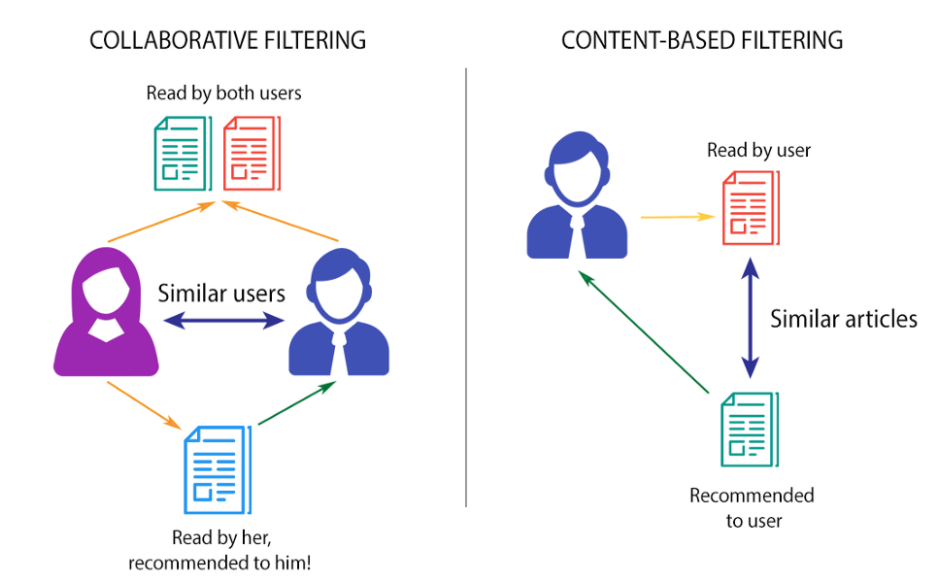

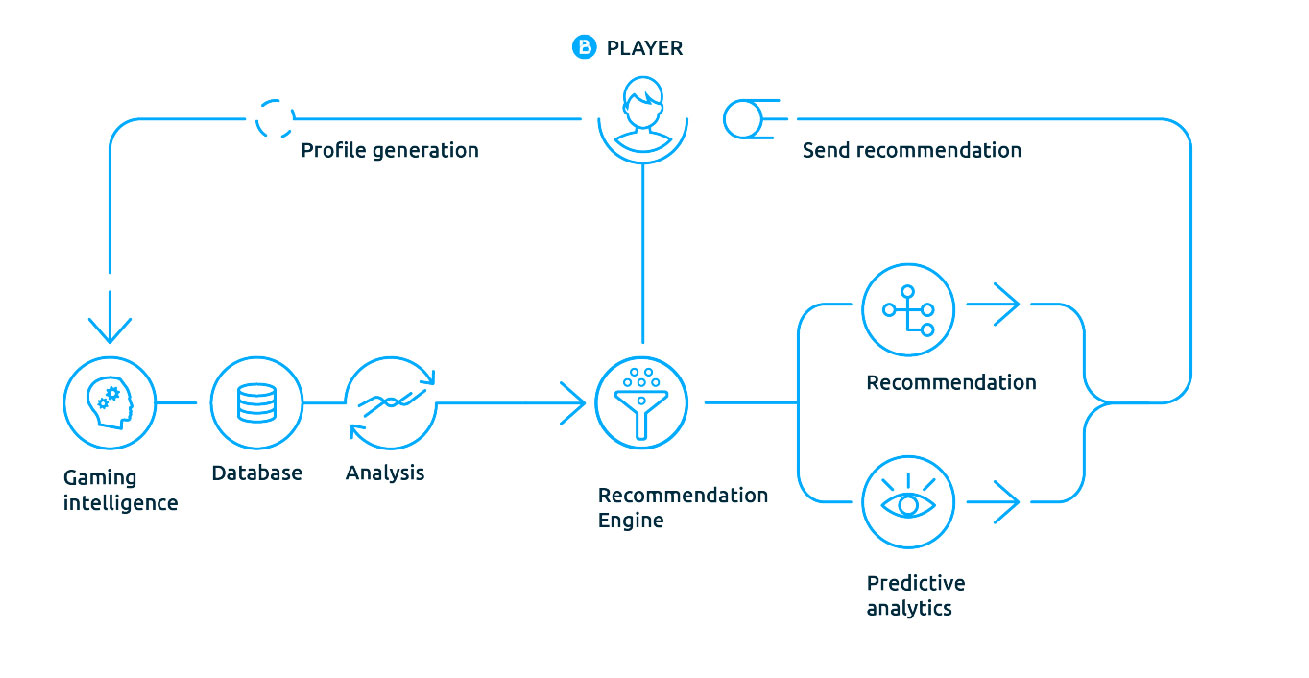

Here we have some steps which we will perform on the given dataset - 
> - **Step1 -** Import all the required libraries.
> - **Step2 -** Introduction about the data.
> - **Step3 -** Load the data.
> - **Step4 -** Data description.
> - **Step5 -** Data preprocessing.
> - **Step6 -** Univariate & Bivariate analysis.
> - **Step7 -** Observations after every plot.
> - **Step8 -** Conclusion.

<h3>Import all the libraries:</h3>

In [1]:
import warnings
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import skew, norm, probplot

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()

<h3>Introduction about the Data:</h3>

**Million Songs Dataset -** The Million Song Dataset is a freely-available collection of audio features and metadata for a million contemporary popular music tracks. The purpose of choosing such a large dataset is to build and test. Although the entire dataset is of 280 GB, we deal only with 3 GB of available sample data which still exhibits characteristics of a large dataset while being moderately computationally intensive to model.

Million Songs Dataset contains of two files: unique_track & triplet_file. 

> 1. The triplet_file contains **User_Id, Song_Id and Listen Counts**. 

> 2. The unique_tack file contains **Track_Id, Song_Id, Artist_Name, Title**.

Million Songs Dataset is a mixture of song from various website with the rating that users gave after listening to the song.

There are 3 types of recommendation system: content-based, collaborative and popularity.

<h3>Load the dataset:</h3>

In [2]:
unique_track = pd.read_csv("kaggle/unique_tracks.txt", sep = "<SEP>", names = ["track_id", "song_id", "artist", "title"])
unique_track.head()

track_id             song_id            artist              title
0  TRMMMYQ128F932D901  SOQMMHC12AB0180CB8  Faster Pussy cat       Silent Night
1  TRMMMKD128F425225D  SOVFVAK12A8C1350D9  Karkkiautomaatti        Tanssi vaan
2  TRMMMRX128F93187D9  SOGTUKN12AB017F4F1    Hudson Mohawke  No One Could Ever
3  TRMMMCH128F425532C  SOBNYVR12A8C13558C       Yerba Brava      Si Vos Querés
4  TRMMMWA128F426B589  SOHSBXH12A8C13B0DF        Der Mystic   Tangle Of Aspens

In [3]:
unique_track.tail()

track_id             song_id          artist  \
999995  TRYYYUS12903CD2DF0  SOTXAME12AB018F136    Kiko Navarro   
999996  TRYYYJO128F426DA37  SOXQYIQ12A8C137FBB   Kuldeep Manak   
999997  TRYYYMG128F4260ECA  SOHODZI12A8C137BB3  Gabriel Le Mar   
999998  TRYYYDJ128F9310A21  SOLXGOR12A81C21EB7           Elude   
999999  TRYYYVU12903CD01E3  SOWXJXQ12AB0189F43           Texta   

                                      title  
999995                      O Samba Da Vida  
999996                         Jago Chhadeo  
999997                              Novemba  
999998                              Faraday  
999999  Fernweh feat. Sektion Kuchikäschtli

In [4]:
triplet = pd.read_csv("kaggle/kaggle_visible_evaluation_triplets.txt", sep = '\t', names = ["user", "song", "play_count"])
triplet.head()

user                song  play_count
0  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SOBONKR12A58A7A7E0           1
1  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SOEGIYH12A6D4FC0E3           1
2  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SOFLJQZ12A6D4FADA6           1
3  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SOHTKMO12AB01843B0           1
4  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SODQZCY12A6D4F9D11           1

In [5]:
triplet.tail()

user                song  \
1450928  5e650759ebf89012044c6d52121eeada8b0ec814  SOVLNXV12A6D4F706E   
1450929  5e650759ebf89012044c6d52121eeada8b0ec814  SOVDSJC12A58A7A271   
1450930  5e650759ebf89012044c6d52121eeada8b0ec814  SOBRHVR12A8C133F35   
1450931  5e650759ebf89012044c6d52121eeada8b0ec814  SOMGVYU12A8C1314FF   
1450932  5e650759ebf89012044c6d52121eeada8b0ec814  SOTCMDJ12A6D4F8528   

         play_count  
1450928           1  
1450929           2  
1450930           2  
1450931           2  
1450932           3

In [6]:
print(unique_track.shape, triplet.shape)

(1000000, 4) (1450933, 3)


* __In unique_track data we have 1000000 records with 4 features and in triplet data we have 1450933 records with 3 features.__

In [7]:
print(sum(unique_track.isnull().any()), sum(triplet.isnull().any()))

1 0


* __We have missing values in unique_track data. Let's see this more-__

In [8]:
unique_track.isnull().sum()

track_id     0
song_id      0
artist       0
title       15
dtype: int64

* __So, in title we have 15 missing values.__

In [9]:
unique_track["song_id"].duplicated().sum()

944

* __In unique_track, song_id has duplicate values and we can drop those rows.__ 

In [10]:
unique_track.drop_duplicates(["song_id"], inplace = True)
unique_track.shape

(999056, 4)

<h3>Unique Track</h3>

In [11]:
print("Unique Song ID's in unique track data are:", len(unique_track["song_id"].unique()))
print("Unique Artist Names in unique track data are:", len(unique_track["artist"].unique()))
print("Unique Titles in unique track data are:", len(unique_track["title"].unique()))

Unique Song ID's in unique track data are: 999056
Unique Artist Names in unique track data are: 72652
Unique Titles in unique track data are: 701923


* __In unique_track, we have 999056 unique song id's, 72652 unique artists and 701923 unique song names.__

<h3>Triplet</h3>

In [12]:
print("Unique users in triplet data are:", len(triplet["user"].unique()))
print("Unique songs in triplet data are:", len(triplet["song"].unique()))
print("Unique play_counts in triplet data are:", len(triplet["play_count"].unique()))

Unique users in triplet data are: 110000
Unique songs in triplet data are: 163206
Unique play_counts in triplet data are: 299


* __In triplet, we have 110000 unique users, 163206 unique songs and 299 play_count values.__

<h3>Merging the triplet and unique track Dataframes:</h3>

In [13]:
song_data = pd.merge(triplet, unique_track, left_on='song', right_on ='song_id', how='left')
song_data.head()

user                song  play_count  \
0  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SOBONKR12A58A7A7E0           1   
1  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SOEGIYH12A6D4FC0E3           1   
2  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SOFLJQZ12A6D4FADA6           1   
3  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SOHTKMO12AB01843B0           1   
4  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SODQZCY12A6D4F9D11           1   

             track_id             song_id  \
0  TRAEHHJ12903CF492F  SOBONKR12A58A7A7E0   
1  TRLGMFJ128F4217DBE  SOEGIYH12A6D4FC0E3   
2  TRTNDNE128F1486812  SOFLJQZ12A6D4FADA6   
3  TRASTUE128F930D488  SOHTKMO12AB01843B0   
4  TRFPLWO128F1486B9E  SODQZCY12A6D4F9D11   

                                              artist  \
0                                      Dwight Yoakam   
1  Barry Tuckwell/Academy of St Martin-in-the-Fie...   
2                                            Cartola   
3                                      Lonnie Gordon   
4                                        Miguel Calo   

                                               title  
0                                     You're The One  
1  Horn Concerto No. 4 in E flat K495: II. Romanc...  
2                                           Tive Sim  
3  Catch You Baby (Steve Pitron & Max Sanna Radio...  
4                                        El Cuatrero

In [14]:
song_data.shape

(1450933, 7)

* __As song and song_id column is same, so we can remove one column.__

In [15]:
song_data.drop(["song_id"], axis = 1, inplace = True)

In [16]:
song_data.isnull().sum()

user          0
song          0
play_count    0
track_id      0
artist        0
title         1
dtype: int64

* __In song_data we have 1 missing value in title, we can Impute / Replace Missing Value with Mode.__

In [17]:
song_data['title'] = song_data['title'].fillna(song_data['title'].mode()[0])

In [18]:
song_data.isnull().sum().sum()

0

In [19]:
print("Total Data points: ", song_data.shape[0])
print("Total no. of users: ", song_data['user'].unique().shape[0])
print("Total no. of songs: ", song_data['song'].unique().shape[0])
print("Total no. of tracks: ", song_data['track_id'].unique().shape[0])

Total Data points:  1450933
Total no. of users:  110000
Total no. of songs:  163206
Total no. of tracks:  163206


In [20]:
print("Number of unique songs: ", song_data['title'].unique().shape[0])
print("Number of unique artists: ", song_data['artist'].unique().shape[0])

Number of unique songs:  137622
Number of unique artists:  28361


In [21]:
song_data.describe()

play_count
count  1.450933e+06
mean   3.187149e+00
std    7.051664e+00
min    1.000000e+00
25%    1.000000e+00
50%    1.000000e+00
75%    3.000000e+00
max    9.230000e+02

In [22]:
song_data.describe(include='object')

user                song  \
count                                    1450933             1450933   
unique                                    110000              163206   
top     7d90be8dfdbde170f036ce8a4b915440137cb11c  SOFRQTD12A81C233C0   
freq                                          53                5043   

                  track_id    artist          title  
count              1450933   1450933        1450933  
unique              163206     28361         137622  
top     TRDMBIJ128F4290431  Coldplay  Sehr kosmisch  
freq                  5043     12279           5044

In [23]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450933 entries, 0 to 1450932
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user        1450933 non-null  object
 1   song        1450933 non-null  object
 2   play_count  1450933 non-null  int64 
 3   track_id    1450933 non-null  object
 4   artist      1450933 non-null  object
 5   title       1450933 non-null  object
dtypes: int64(1), object(5)
memory usage: 77.5+ MB


__Top 10 artists, songs, users in the dataset -__

In [24]:
song_data['artist'].value_counts()[:10]

Coldplay                  12279
Kings Of Leon              8514
Florence + The Machine     8213
Justin Bieber              7669
Jack Johnson               6784
Train                      6617
The Black Keys             6507
Eminem                     6297
OneRepublic                6027
Muse                       5849
Name: artist, dtype: int64

In [25]:
song_data['song'].value_counts()[:10]

SOFRQTD12A81C233C0    5043
SOAUWYT12A81C206F1    4483
SOBONKR12A58A7A7E0    4136
SOAXGDH12A8C13F8A1    3780
SOSXLTC12AF72A7F54    3672
SONYKOW12AB01849C9    3430
SOEGIYH12A6D4FC0E3    3272
SODJWHY12A8C142CCE    2791
SOLFXKT12AB017E3E0    2725
SOFLJQZ12A6D4FADA6    2668
Name: song, dtype: int64

In [26]:
song_data['title'].value_counts()[:10]

Sehr kosmisch                                                          5044
Undo                                                                   4483
You're The One                                                         4270
Dog Days Are Over (Radio Edit)                                         3780
Revelry                                                                3672
Secrets                                                                3456
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)    3272
Hey_ Soul Sister                                                       2791
Fireflies                                                              2745
Tive Sim                                                               2669
Name: title, dtype: int64

__Let's see Kernel Density Estimate which is used for visualizing the Probability Density -__

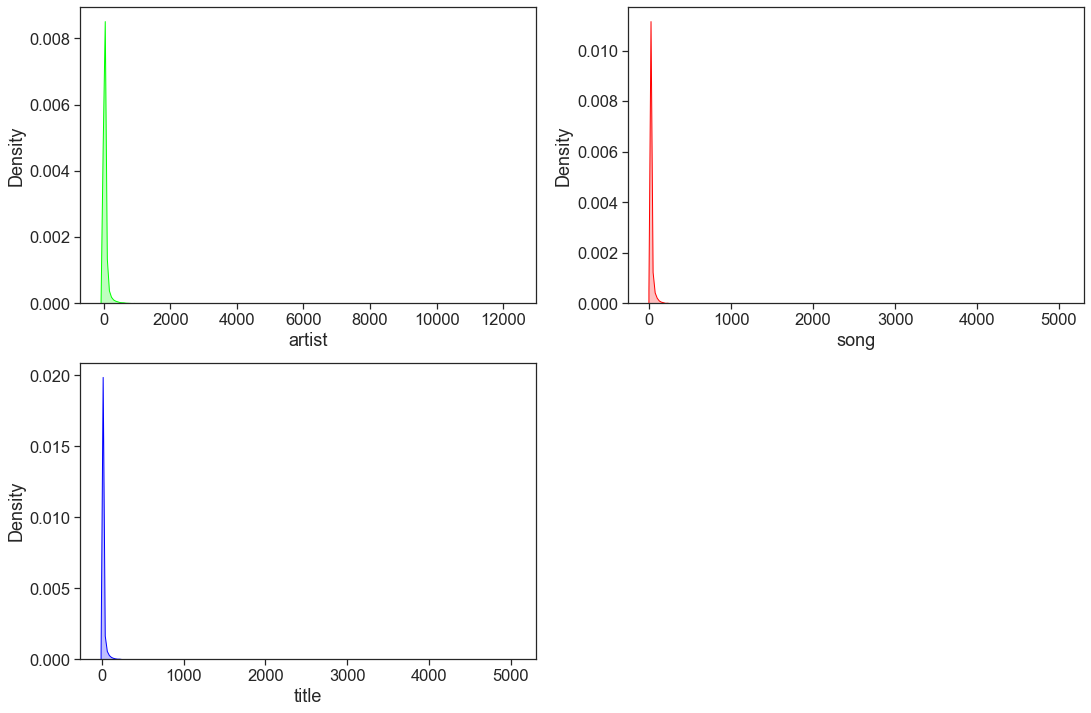

In [27]:
fig = plt.figure(figsize=(18, 12))

a1 = fig.add_subplot(221)
f1 = sns.kdeplot(data=song_data, shade=True, color='lime', x=song_data["artist"].value_counts())

a2 = fig.add_subplot(222)
f1 = sns.kdeplot(data=song_data, shade=True, color='red', x=song_data["song"].value_counts())

a1 = fig.add_subplot(223)
f1=sns.kdeplot(data=song_data, shade=True, color='blue', x=song_data["title"].value_counts())

* __As we can see that there are some artists, songs, titles whose frequencies are high in the dataset.__

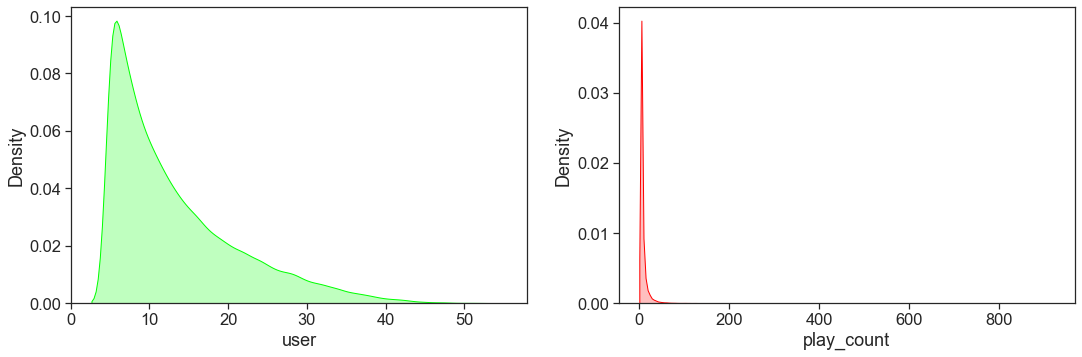

In [28]:
fig = plt.figure(figsize=(18, 12))

a1 = fig.add_subplot(221)
f1=sns.kdeplot(data=song_data, shade=True, color='lime',  x=song_data["user"].value_counts())

a1 = fig.add_subplot(222)
f1=sns.kdeplot(data=song_data, shade=True, color='red', x=song_data["play_count"])

* __user column is positively skewed and many users listen many songs and as the play_count values increases it's frequency decreases.__ 

In [29]:
df1 = song_data.groupby('user')

In [30]:
df1['user'].count().max()

53

In [31]:
df1 = song_data.groupby(['user',]).agg({'song':'count'}).sort_values('song', ascending=False).reset_index()
df1.head(10) 

user  song
0  7d90be8dfdbde170f036ce8a4b915440137cb11c    53
1  d30e18323f15426c3cdc8585252ed34459916f51    52
2  03ad93fdb01506ce205f4708decf8e4b1ae90fff    52
3  2e424b28bff1f62a2dae22a918f09f9c30c06d1b    52
4  016a24e91a72c159a5048ab1b9b2ba5ce761b526    52
5  0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90    52
6  e08848e92427e9ef8add59a1264c484e1078d5a5    51
7  9769ebffc543fa42b58daf6f52f8816abf5f408e    51
8  7e27789eae69bc946c51833c0b833a49c58ed9ed    51
9  992fea335363e87217e1b052fd7380b3fd7e35b4    51

Mean  3.1871492343202616
Median  1.0
Minimum value  1
Maximum value  923


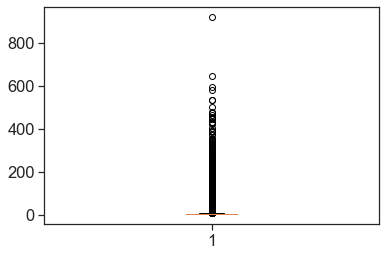

In [32]:
print("Mean ", song_data['play_count'].mean())
print("Median ", song_data['play_count'].median())
print("Minimum value ", song_data['play_count'].min())
print("Maximum value ", song_data['play_count'].max())

plt.boxplot(song_data['play_count'])
plt.show()

* **In play_count, we can see we have many values which are extremely high. These are detected as a outlier but these are not actually the outliers because there are only few users who listen the single song so many times so we can not remove these. Boxplot helps to identify the outliers. And it also tells the mean, median, IQR.**

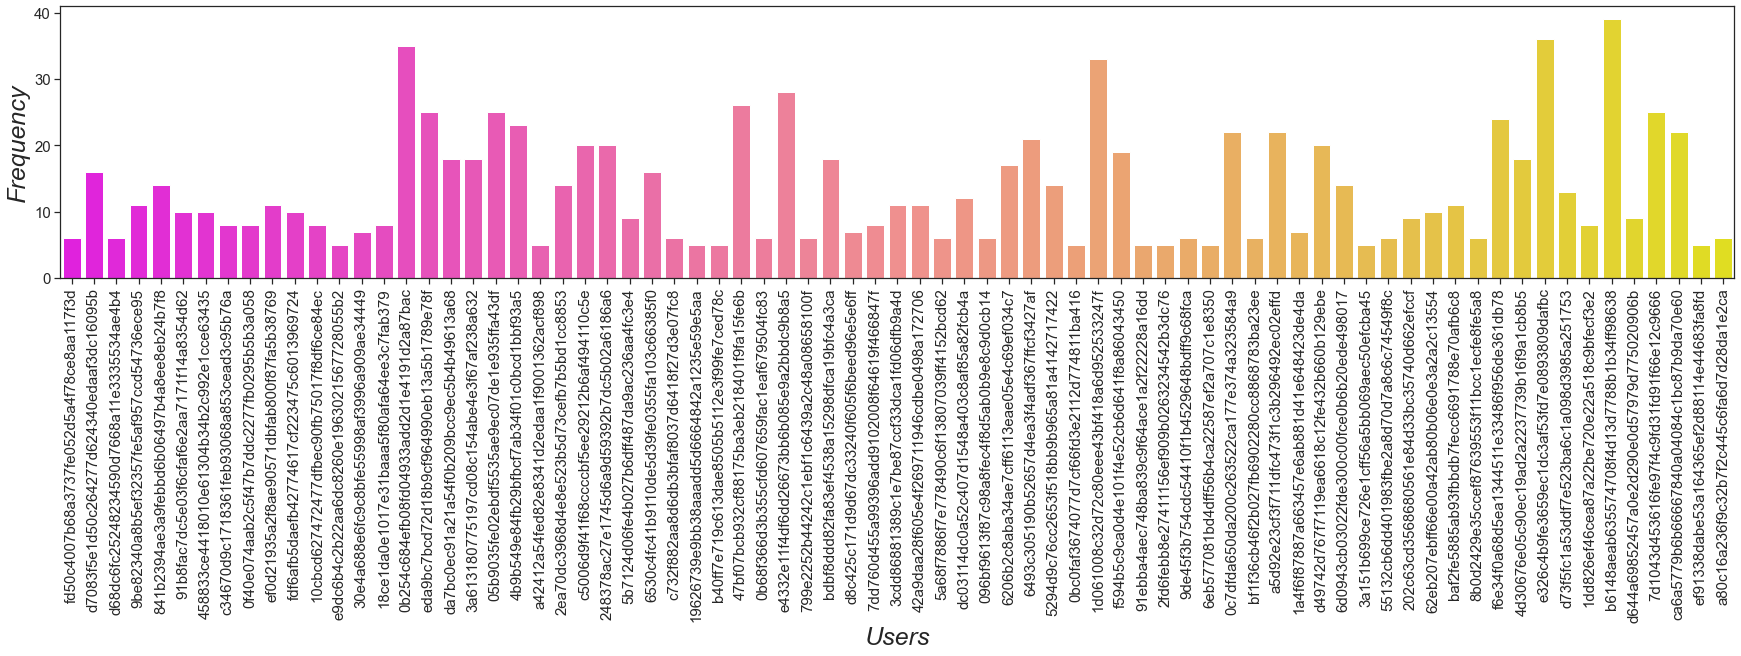

In [33]:
plt.figure(figsize=(30, 5))
sns.countplot(x='user', data=song_data[:1000], palette='spring')
plt.xticks(fontsize=15)
plt.xticks(rotation=90)
plt.yticks(fontsize=15)
plt.xlabel('Users', fontsize=25, style='oblique')
plt.ylabel('Frequency', fontsize=25, style='oblique')
plt.show()

* __In a subset of dataset we can see that These are some users who listen many songs.__

In [34]:
from wordcloud import WordCloud

sentences = song_data.title.tolist()
sentences

["You're The One",
 'Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)',
 'Tive Sim',
 'Catch You Baby (Steve Pitron & Max Sanna Radio Edit)',
 'El Cuatrero',
 'Unite (2009 Digital Remaster)',
 'Lift Me Up',
 'Living In A Lie',
 'Open Your Eyes',
 'Kurtizana',
 'Happy Hour Hero',
 'Dreamcatcher',
 'Sleep Sound In Jesus',
 'Space Cowboy',
 'Mine All Mine',
 'Rain',
 "She's My Heroine",
 "Ain't Got Time",
 'Bullet With Butterfly Wings (smashing Pumpkins Cover)',
 'Crossing The Deadline',
 'Little L',
 'Big In Japan',
 'Sehr kosmisch',
 'Heretics (early version)',
 'Respect (Amended Version)',
 'Love Is A Deserter',
 'Dog Days Are Over (Radio Edit)',
 'Devil In The Details (Album Version)',
 'Climax',
 'Finding Myself',
 'Oxford Comma (Album)',
 'The Count Of Monte Christo',
 'Hardcore Days & Softcore Nights (Album Version)',
 'Old School',
 'Universal Traveler',
 "Rock Rock Y'all",
 'I Got 5 On It',
 'Beat Goes On [Featuring Kanye West] (Album Version)',
 'What They Do'

In [35]:
sentences_string = " ".join(sentences)

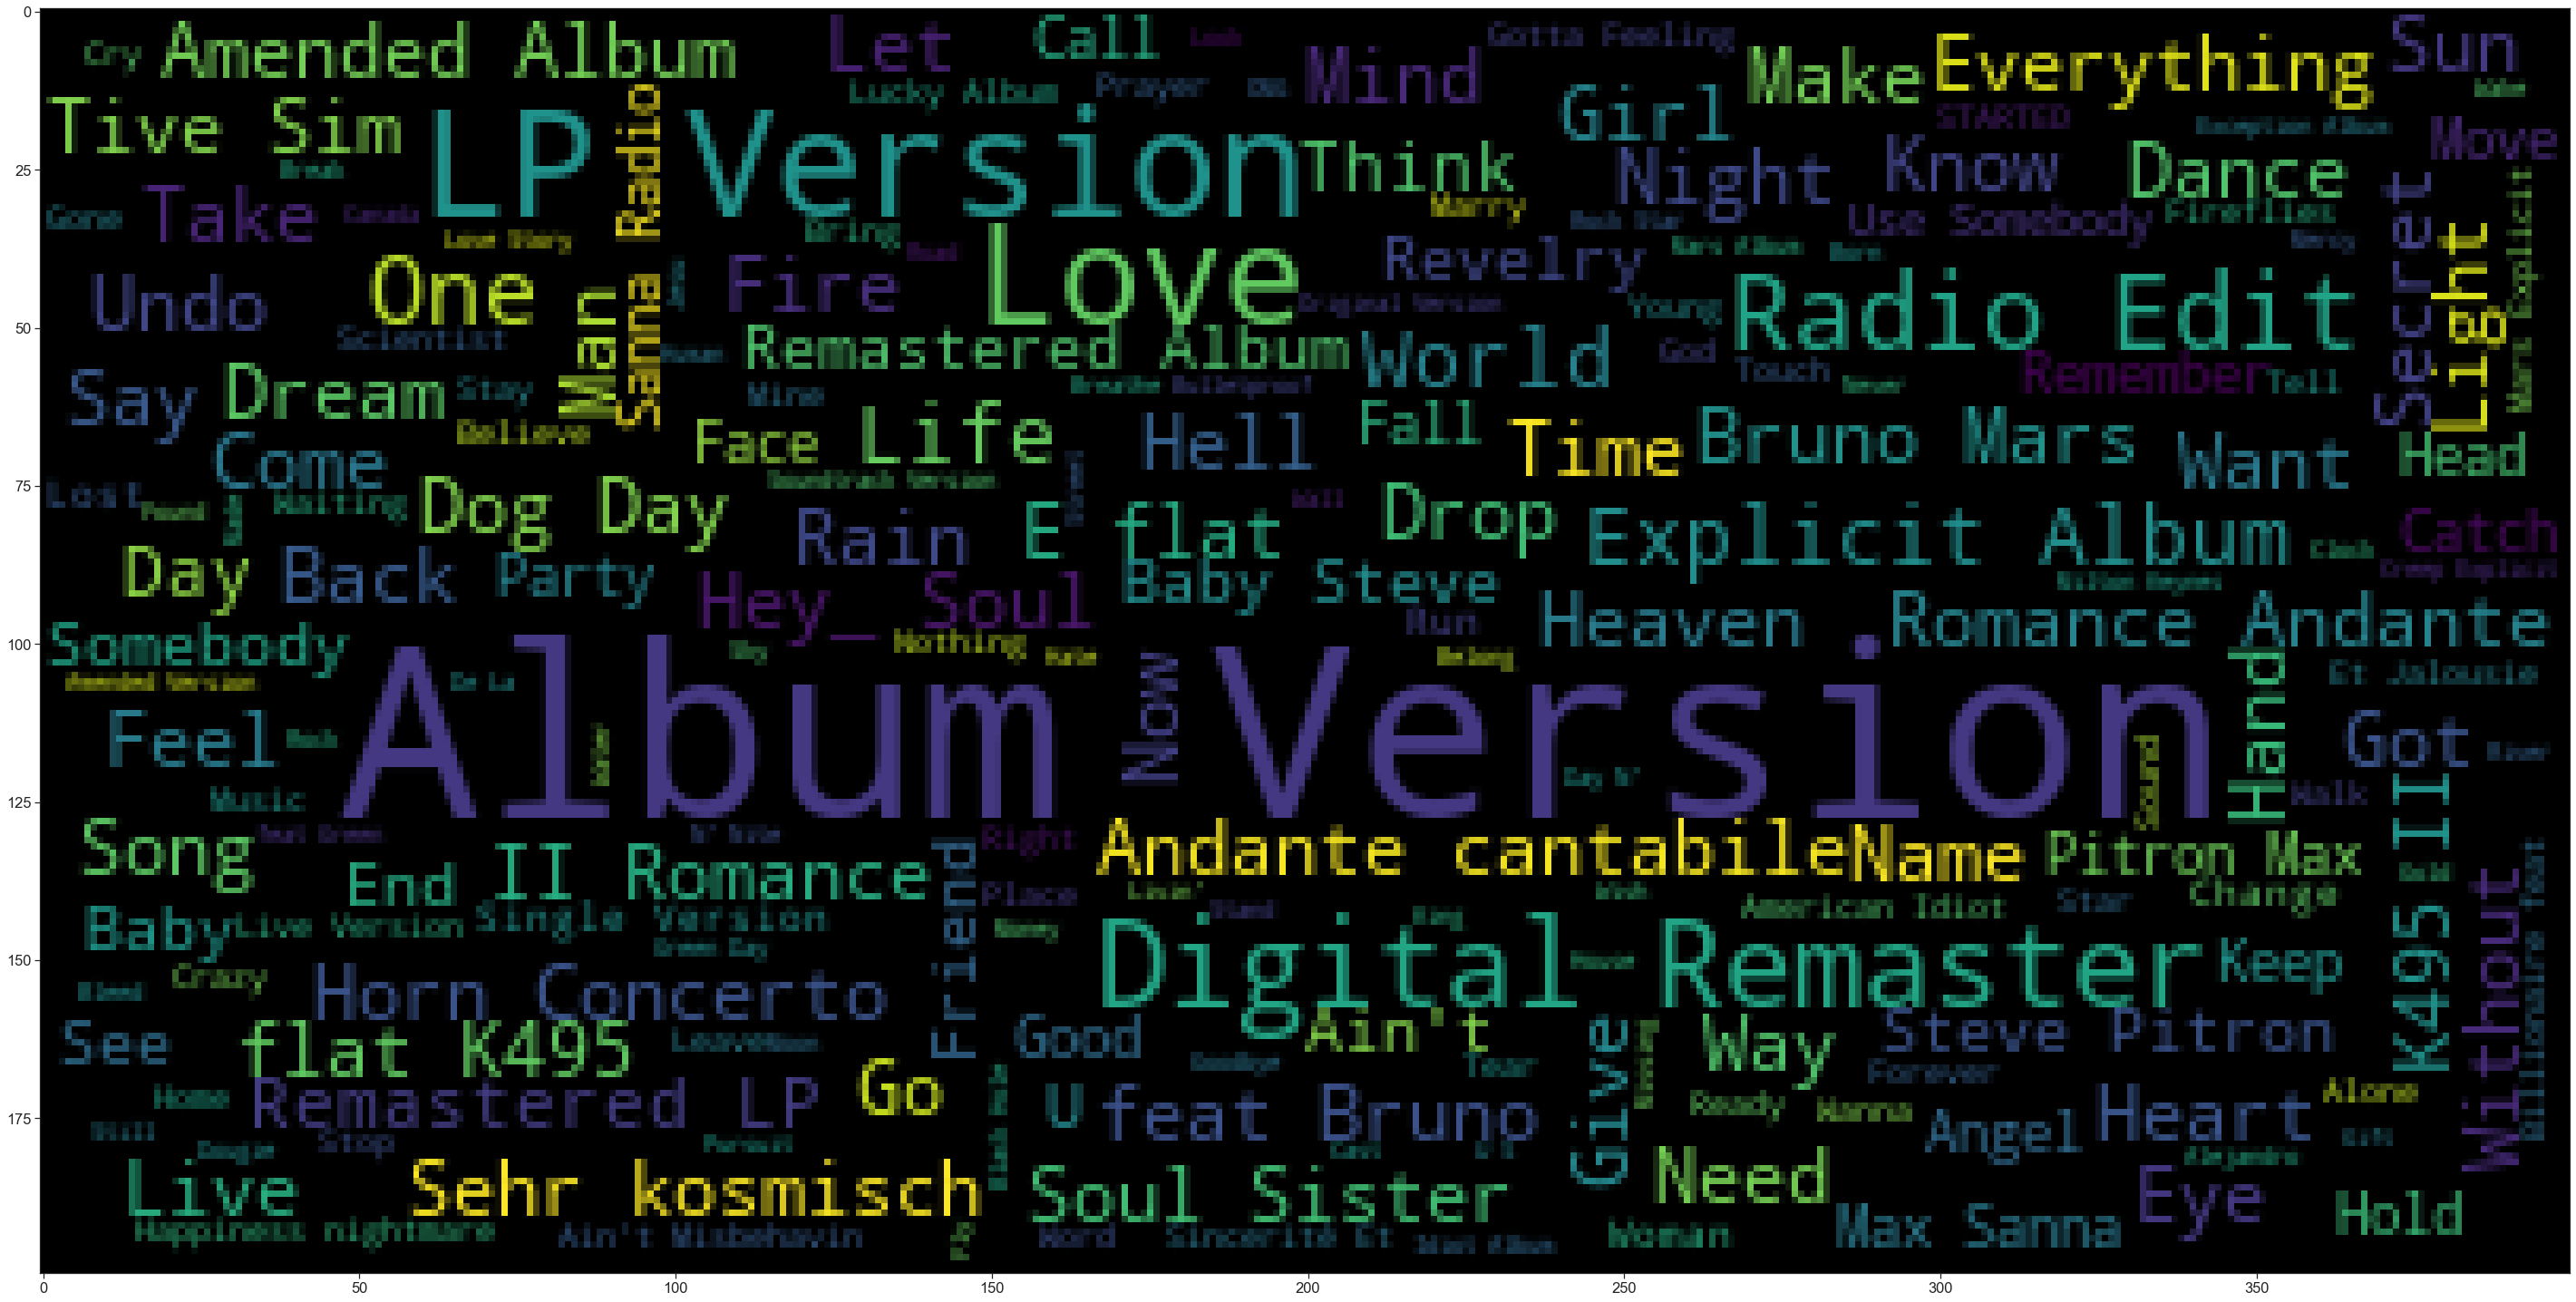

In [36]:
plt.figure(figsize=(50, 50))
plt.imshow(WordCloud().generate(sentences_string))

* __Word Cloud of all the titles.__

In [37]:
px.bar(song_data[:100], x='user', y='title', color='title', width=1000, hover_data=['user', 'title'], animation_frame='play_count')

In [38]:
data1 = song_data.copy()

In [39]:
bins = [0, 1, 5, 10, 25, 50, 100, 200, 400, 1000]
data1['binned'] = pd.cut(data1['play_count'], bins, 
                         labels=['1_time', '2-5_times', '6-10_times', '11-25_times', '26-50_times', '51-100_times',
                                '101-200_times', '201-400_times', '400+_times'])

In [40]:
data1['binned'].head()

0    1_time
1    1_time
2    1_time
3    1_time
4    1_time
Name: binned, dtype: category
Categories (9, object): ['1_time' < '2-5_times' < '6-10_times' < '11-25_times' ... '51-100_times' < '101-200_times' < '201-400_times' < '400+_times']

In [41]:
data1['binned'].tail()

1450928       1_time
1450929    2-5_times
1450930    2-5_times
1450931    2-5_times
1450932    2-5_times
Name: binned, dtype: category
Categories (9, object): ['1_time' < '2-5_times' < '6-10_times' < '11-25_times' ... '51-100_times' < '101-200_times' < '201-400_times' < '400+_times']

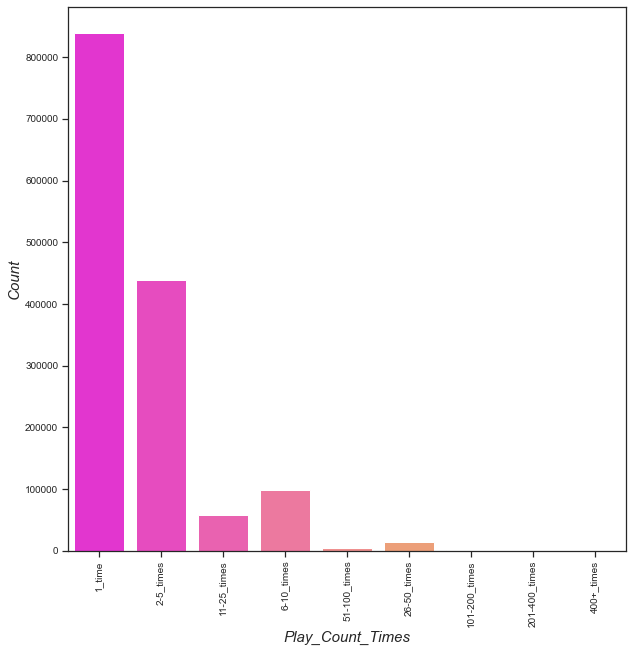

In [42]:
plt.figure(figsize=(10,10))
sns.countplot(data1['binned'].astype('str'), data=data1, palette='spring')
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.yticks(fontsize=10)
plt.xlabel('Play_Count_Times', fontsize=15, style='oblique')
plt.ylabel('Count', fontsize=15, style='oblique')
plt.show()

* __Most of the users listen any song 1 time or 2-5 times. There are very less users who listen any song more than 100 times.__

In [43]:
data1['binned'].loc[data1['play_count']>200].count()

154

* __There are only 154 users who listen single song more than 200 times.__

<h3>Analysis of Songs</h3>

In [44]:
song_grouped = song_data.groupby(['song',]).agg({'play_count':'count'}).sort_values('play_count', ascending=False).reset_index()
song_grouped.head(10) 

song  play_count
0  SOFRQTD12A81C233C0        5043
1  SOAUWYT12A81C206F1        4483
2  SOBONKR12A58A7A7E0        4136
3  SOAXGDH12A8C13F8A1        3780
4  SOSXLTC12AF72A7F54        3672
5  SONYKOW12AB01849C9        3430
6  SOEGIYH12A6D4FC0E3        3272
7  SODJWHY12A8C142CCE        2791
8  SOLFXKT12AB017E3E0        2725
9  SOFLJQZ12A6D4FADA6        2668

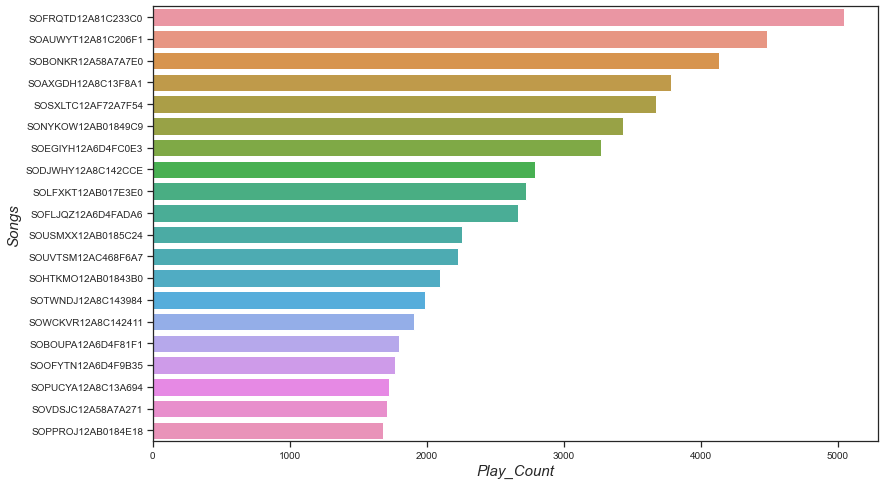

In [45]:
plt.figure(figsize = (13,8))
sns.barplot(y=song_grouped['song'][:20], x=song_grouped["play_count"])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Play_Count', fontsize=15, style='oblique')
plt.ylabel('Songs', fontsize=15, style='oblique')
plt.show()

* __Top 20 songs, that many user listen many times.__

#### So we have to be careful when creating a recommendation system that can be affected by the outliers. Let's take a look at the top 20 in the different features we have:

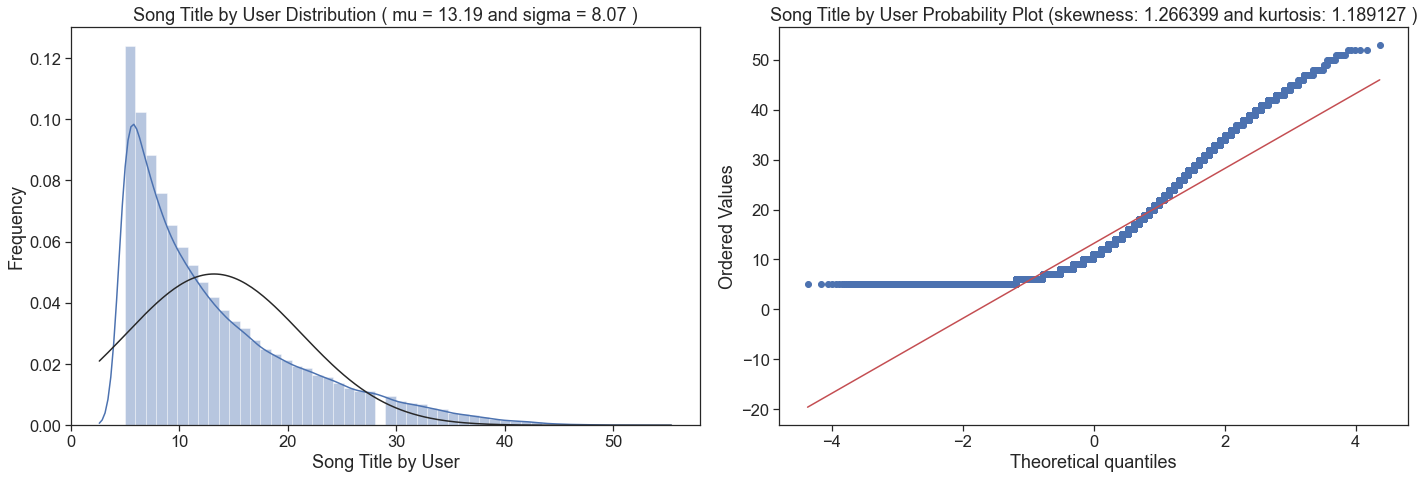

0        1         2    3    4     5     6     7
index     count     mean       std  min  25%   50%   75%   max
title  110000.0  13.1903  8.070827  5.0  7.0  11.0  17.0  53.0

In [46]:
user_song_count_distribution = song_data[['user','title']].groupby('user').count().\
                                reset_index().sort_values(by='title',ascending = False)

def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()
    
QQ_plot(user_song_count_distribution.title, 'Song Title by User')
user_song_count_distribution.title.describe().reset_index().T

From the first graph above we can see that song title by user distribution is skewed, has a peak on the left and a long tail to the right. It deviates from normal distribution and is somewhat positively biased.

From the Probability Plot, we could see that song title by user also does not align with the diagonal red line which represent normal distribution. The form of its distribution confirm that is a skewed right.

With skewness positive of 1.25, we confirm the lack of symmetry and indicate that song title by user are skewed right, as we can see too at the song title by user distribution plot, skewed right means that the right tail is long relative to the left tail, as we expect in counts. The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers, and positive kurtosis indicates a heavy-tailed distribution and negative kurtosis indicates a light tailed distribution. So, with 1.54 of positive kurtosis song title by user are acceptable, although we can accept the kurtosis within 3.

OK, let's take a look at the distribution of the number of times users heard the most popular song.

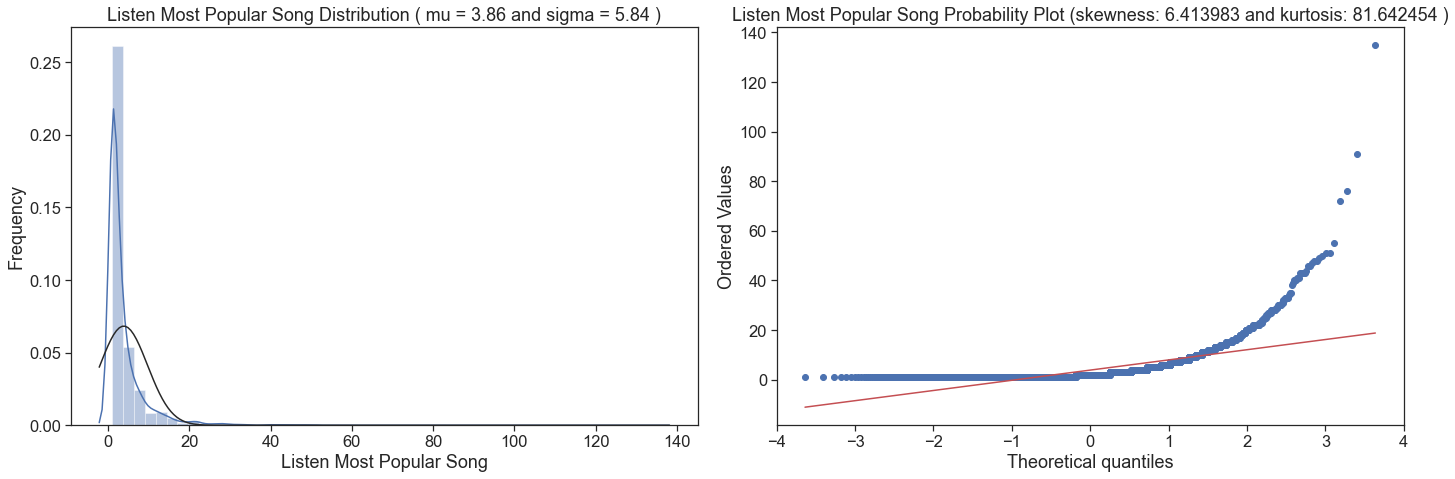

In [47]:
QQ_plot(song_data[song_data["title"]=="Sehr kosmisch"].play_count, 'Listen Most Popular Song')

Here we can see skewness and kurtosis are high and its positively skewed.

<h3>Analysis of Users</h3>

### Lets see how much time user listening a songs

In [48]:
song_per_user = song_data.groupby(['user',]).agg({'play_count':'count'}).sort_values('play_count', ascending=False).reset_index() 

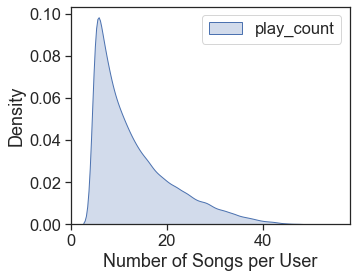

In [49]:
plt.figure(figsize = (5,4))
plt.xlabel("Number of Songs per User")
sns.kdeplot(data=song_per_user, shade=True, color='blue' )
plt.show()

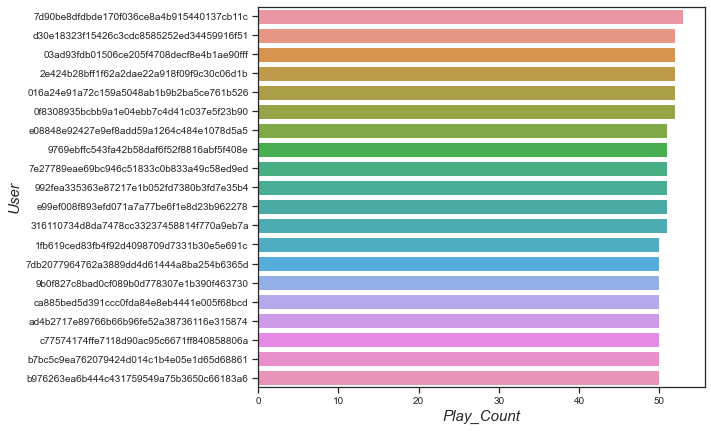

In [50]:
plt.figure(figsize = (8,7))
sns.barplot(y=song_per_user['user'][:20], x=song_per_user["play_count"])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Play_Count', fontsize=15, style='oblique')
plt.ylabel('User', fontsize=15, style='oblique')
plt.show()

* __Top 20 users, who listen any song many times.__

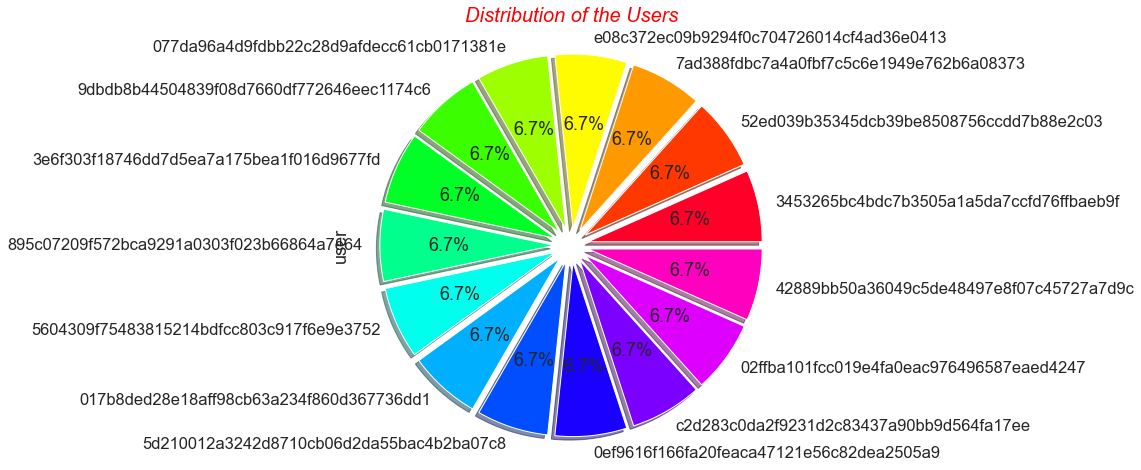

In [51]:
plt.figure(figsize = (20,8))
song_per_user['user'].value_counts().head(15).plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,cmap='gist_rainbow')
plt.title('Distribution of the Users', style='oblique', fontsize=20, color='red')
plt.show()

<h3>Analysis of artist</h3>

In [52]:
popular_artist = song_data.groupby(['artist',]).agg({'play_count':'count'}).sort_values('play_count', ascending=False).reset_index()
popular_artist.head(10)

artist  play_count
0                Coldplay       12279
1           Kings Of Leon        8514
2  Florence + The Machine        8213
3           Justin Bieber        7669
4            Jack Johnson        6784
5                   Train        6617
6          The Black Keys        6507
7                  Eminem        6297
8             OneRepublic        6027
9                    Muse        5849

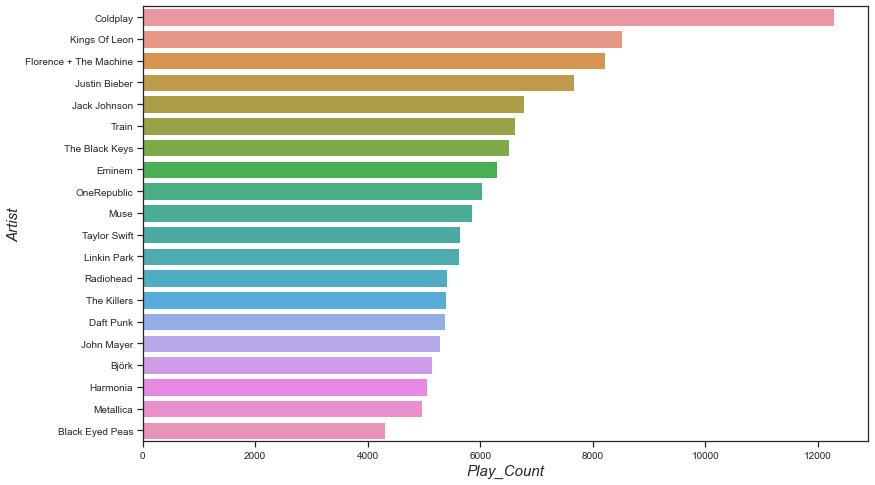

In [53]:
plt.figure(figsize = (13,8))
sns.barplot(y=popular_artist['artist'][:20], x=popular_artist["play_count"])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Play_Count', fontsize=15, style='oblique')
plt.ylabel('Artist', fontsize=15, style='oblique')
plt.show()

* __Top 20 artists whose songs, user listen many times.__

<h3>Analysis of Song titles</h3>

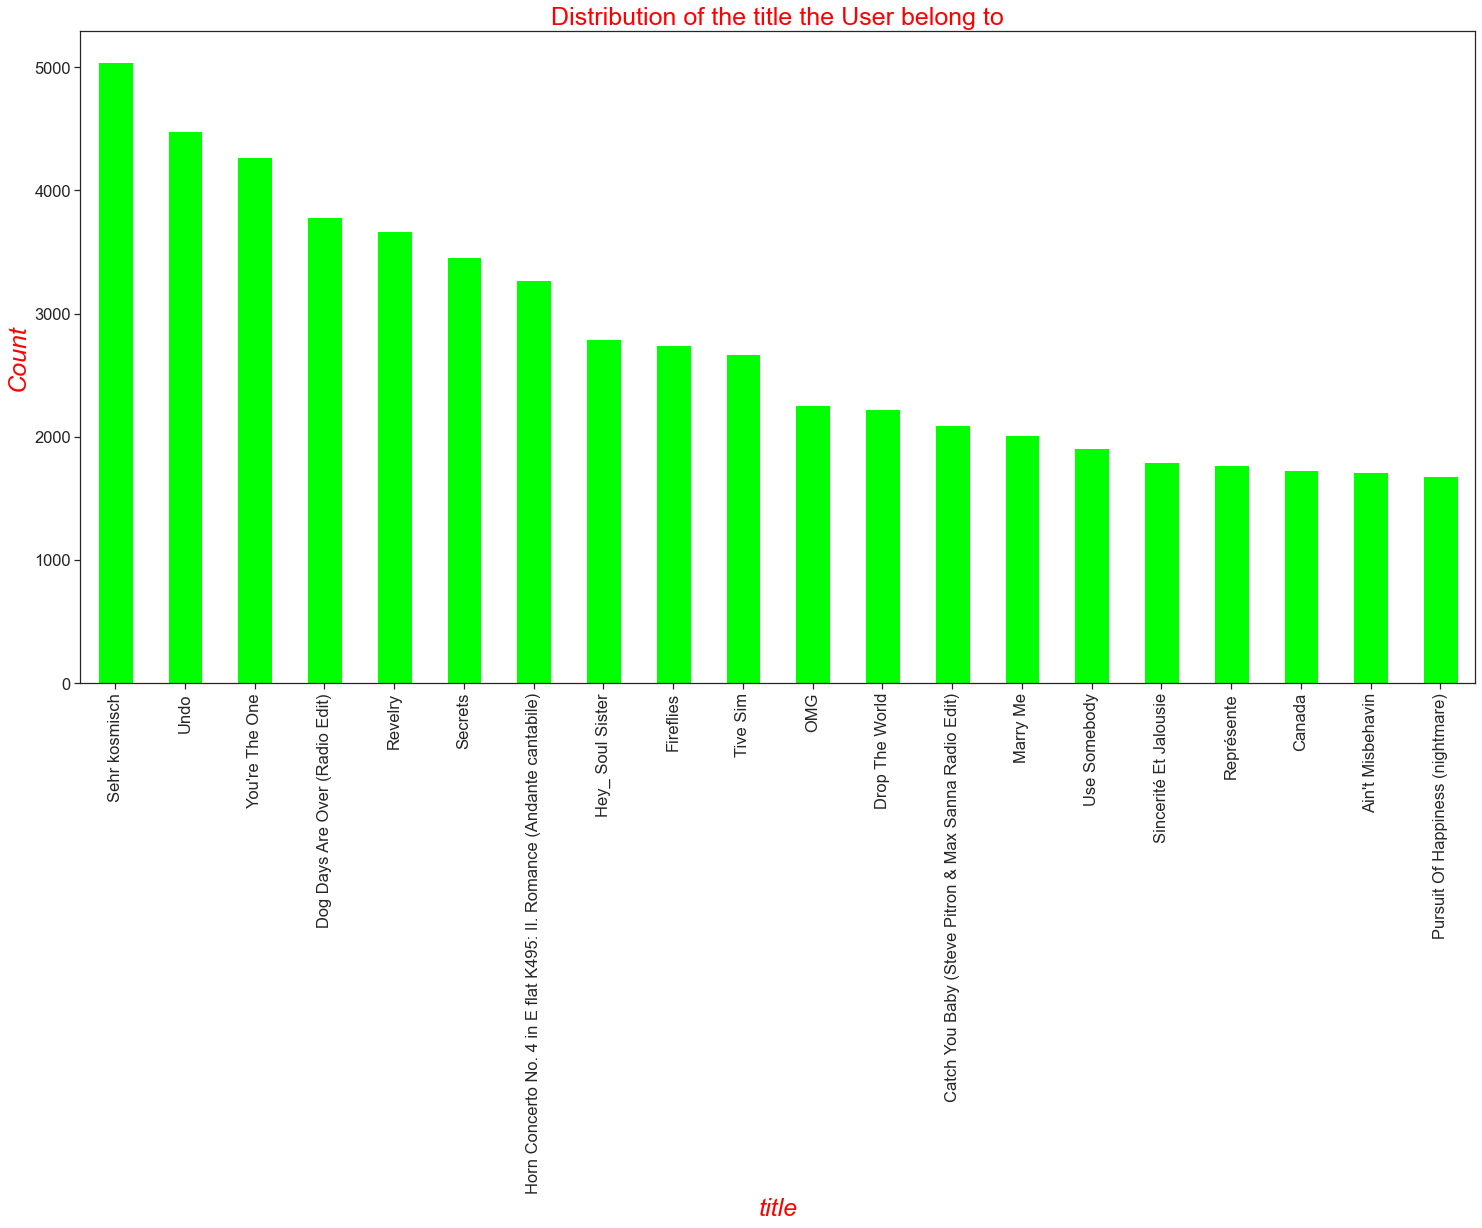

In [54]:
plt.figure(figsize = (25,12))
song_data['title'].value_counts().head(20).plot.bar(color='lime')
plt.title('Distribution of the title the User belong to', color='red', fontsize=25)
plt.xlabel('title', color='red', style='oblique', fontsize=25)
plt.ylabel('Count', color='red', style='oblique', fontsize=25)
plt.show()

* __These are top 20 popular song titles.__

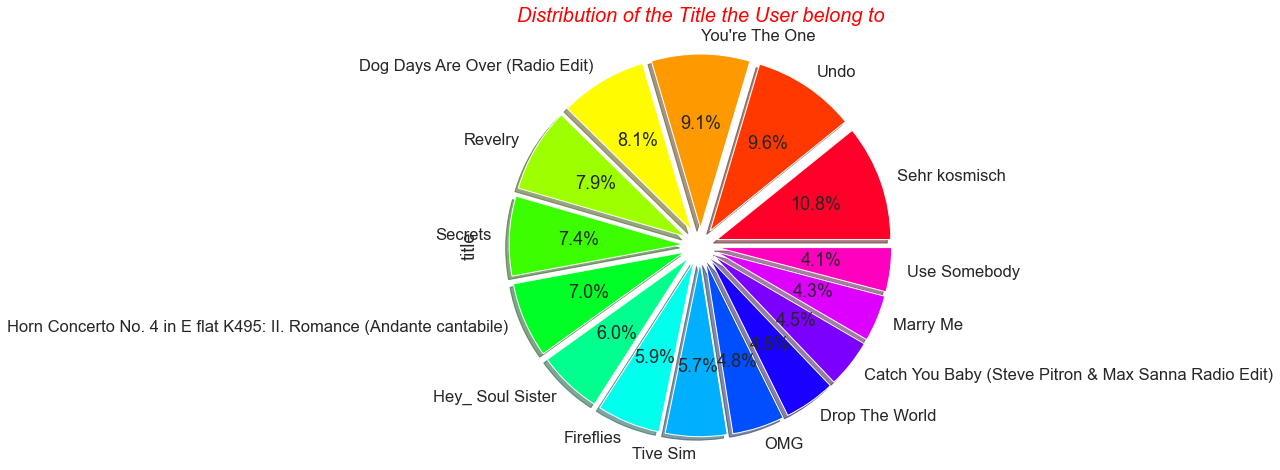

In [55]:
plt.figure(figsize = (20,8))
song_data['title'].value_counts().head(15).plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], autopct='%1.1f%%', shadow=True, cmap='gist_rainbow')
plt.title('Distribution of the Title the User belong to', style='oblique', fontsize=20, color='red')
plt.show()

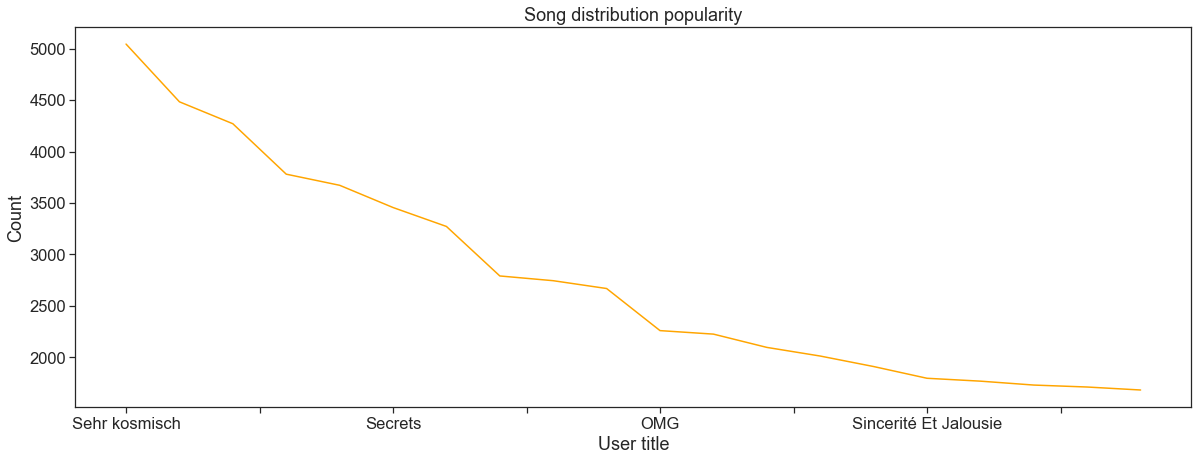

In [56]:
plt.figure(figsize = (20,7))
song_data['title'].value_counts().head(20).plot.line(color = 'orange')
plt.title('Song distribution popularity')
plt.xlabel('User title')
plt.ylabel('Count')
plt.show()

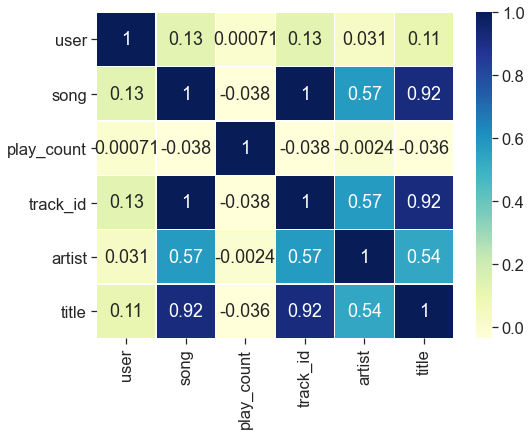

In [57]:
plt.figure(figsize=(8, 6))
mask = np.array(song_data.corr())
mask[np.tril_indices_from(mask)]=False
corr = song_data.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, annot=True,yticklabels=corr.columns, 
                 linewidths=.2,cmap="YlGnBu")

<h3>Top 20 track_id, users, songs, artists, titles</h3>

graph for track_id: total = 20


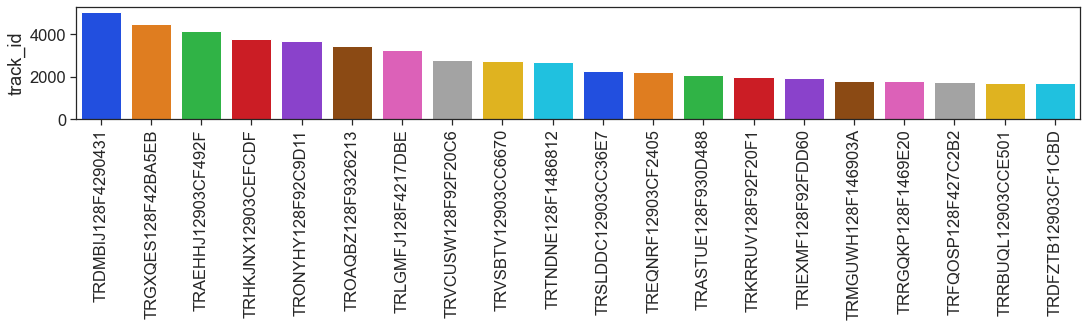

graph for user: total = 20


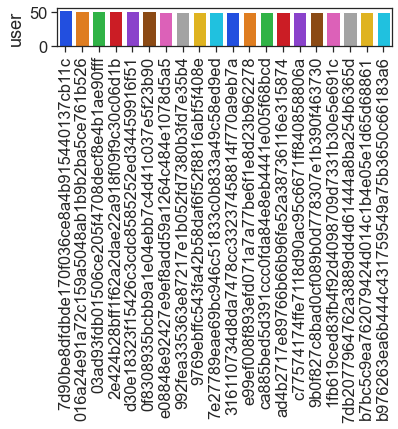

graph for song: total = 20


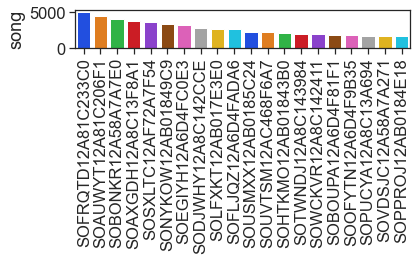

graph for artist: total = 20


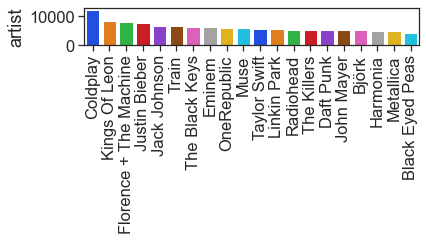

graph for title: total = 20


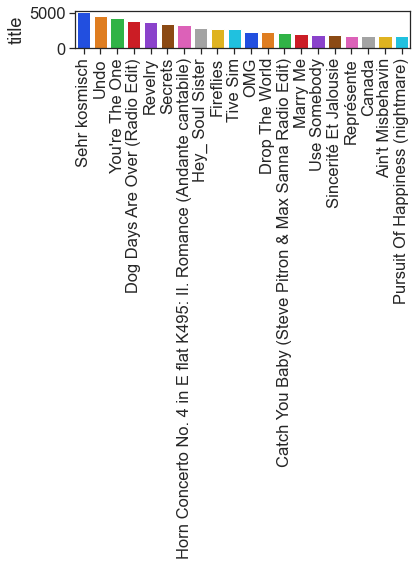

In [58]:
fig = plt.figure(figsize=(18, 12))
j = 0

for i in song_data[['track_id', 'user', 'song', 'artist', 'title']].columns:
    plt.subplot(5, 1, j+1)
    j += 1
    cat_num = song_data[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num, palette='bright')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

<h3>Conclusion:</h3>

> **As you see, the task to building a recommendation engine is not to hard, and we didn't use any library to can have better understanding of what goes on behind a recommendation engine. Once we have defined the focus entity, our greatest effort will be to prepare the data according to this entity and to meet the recommended recommendation algorithm.**

> **The choice of the algorithm also passes through the information we have, but as we have seen, even with few characteristics, we can develop systems of recommendations of diverse complexity and with expressive results for the business.**

<h3>Next Steps:</h3>

> **Use the original Million Song Dataset to get others features and use it on the recommendations.**

> **Use others datasets and apply this methods, and extend to cases where the dataset has some hating score for the item.**

> **Make popular, content-based, collaborative-based recommendation system.**

> **Use a more sophisticated implementation of the matrix factorization routine.**

> **Find different ways of handling it and experiment with various measures then "implicit feedback".**

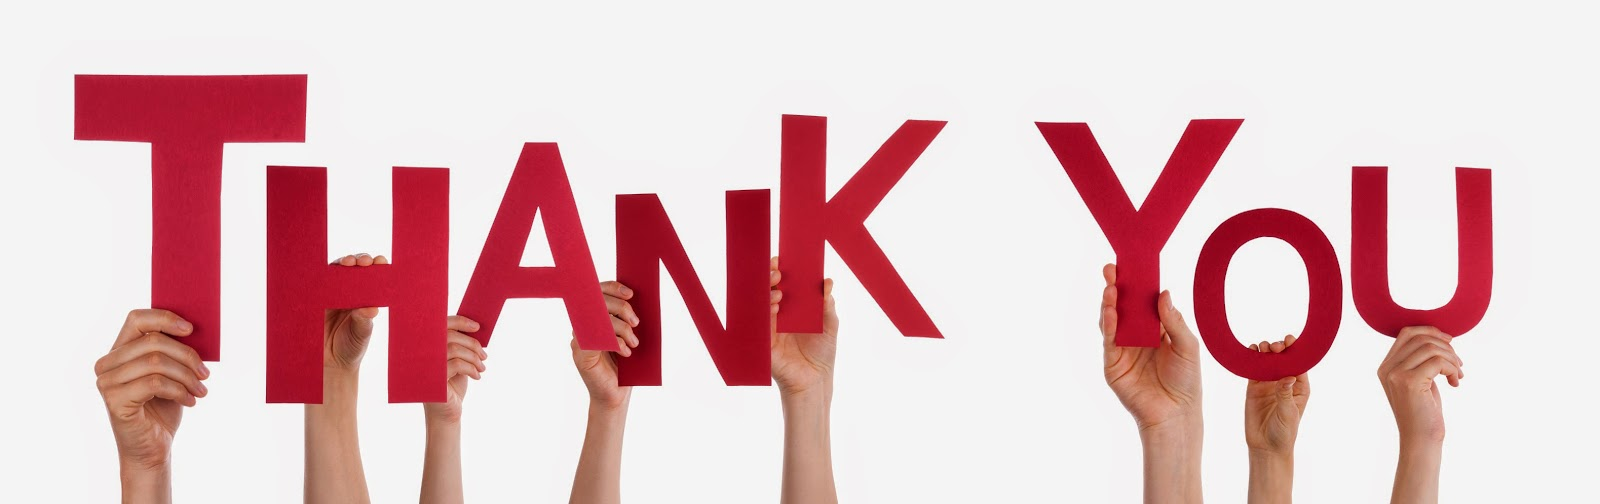